In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_csv('df_without_outliers.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score 

In [4]:
df_continuous = df.copy(deep=True)

E:\Anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


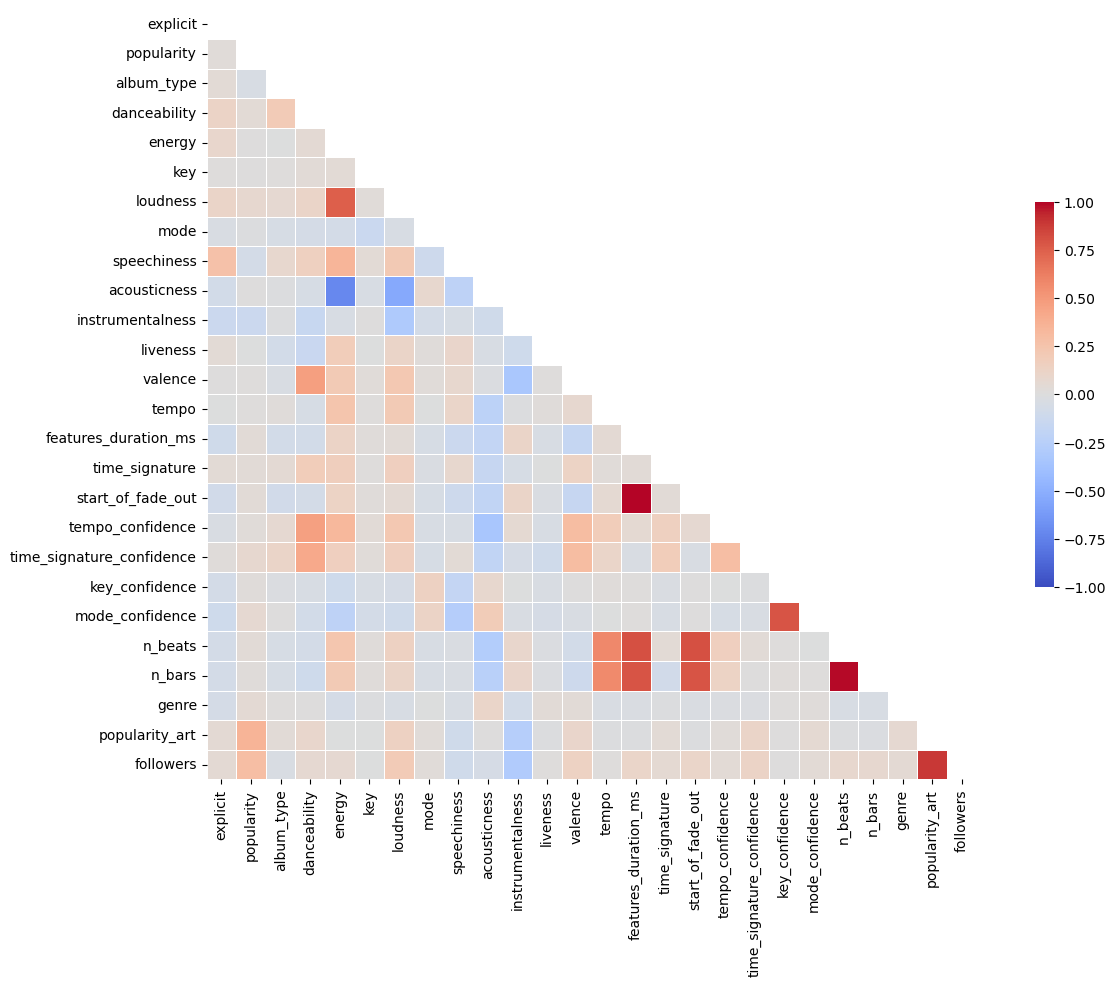

In [ ]:
corr_spearman = df_continuous.corr(method='spearman')

mask = np.triu(np.ones_like(corr_spearman, dtype=bool))
plt.figure(figsize=(15, 10))

# generate a heatmap
sns.heatmap(corr_spearman, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [6]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Random Forest Regressor

## Popularity

In [8]:
df_continuous

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89336,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07
89337,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04
89338,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07
89339,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04


In [11]:
X = df_continuous.drop(columns=['popularity']).values
y = np.array(df_continuous['popularity'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
reg = RandomForestRegressor()
parameters = {
    "n_estimators": [10, 100, 200]
}

In [15]:
RSKF = KFold(
    n_splits=10
)

grid = RandomizedSearchCV(
    reg,
    n_iter=3,
    param_distributions = parameters,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'n_estimators': [10, 100, 200]},
                   random_state=0, verbose=2)

In [16]:
grid.best_params_

{'n_estimators': 200}

In [17]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,28.646192,2.816571,0.044842,0.008570,10,{'n_estimators': 10},0.621059,0.598646,0.605585,0.623067,0.615177,0.620058,0.586522,0.600880,0.599620,0.617477,0.608809,0.011633,3
1,338.241293,2.978342,0.396108,0.031252,100,{'n_estimators': 100},0.656188,0.637290,0.642135,0.649078,0.655228,0.653398,0.630857,0.638309,0.637362,0.654341,0.645419,0.008793,2
2,635.613441,76.792765,0.725347,0.133593,200,{'n_estimators': 200},0.657952,0.637674,0.645274,0.649560,0.658067,0.654504,0.635361,0.641010,0.641080,0.657415,0.647790,0.008390,1


In [18]:
regr = RandomForestRegressor(random_state=0,
                             n_estimators=200,
                             criterion='squared_error'
                             )
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.6401562688936835

In [19]:
y_pred = regr.predict(X_test)

In [20]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6401562688936835
9.295629989635485
166.71367202877906


## Acousticness (computed from n_beats, n_bars, state_of_fade_out, tempo, tempo_confidence, energy, loudness, speechiness)

In [30]:
columns_to_select = ['acousticness', 'n_beats', 'n_bars', 'energy', 'loudness', 
                     'start_of_fade_out', 'tempo', 'tempo_confidence', 'speechiness']

In [31]:
df_new = df[columns_to_select]

In [33]:
X_a_rd = df_new.drop(columns=['acousticness']).values
y_a_rd = np.array(df_new['acousticness'])

In [34]:
X_train_a_rd, X_test_a_rd, y_train_a_rd, y_test_a_rd = train_test_split(X_a_rd, y_a_rd, test_size=0.3, random_state=100)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train_a_rd)
X_train_a_rd = scaler.transform(X_train_a_rd)
X_test_a_rd = scaler.transform(X_test_a_rd)

In [36]:
reg = RandomForestRegressor()
parameters = {
    "n_estimators": [10, 100, 200]
}

In [43]:
RSKF = KFold(
    n_splits=10
)

grid = RandomizedSearchCV(
    reg,
    n_iter=3,
    param_distributions = parameters,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)
  
# fitting the model for grid search
grid.fit(X_train_a_rd, y_train_a_rd)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'n_estimators': [10, 100, 200]},
                   random_state=0, verbose=2)

In [44]:
grid.best_params_

{'n_estimators': 200}

In [46]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,12.997144,1.964323,0.041738,0.011248,10,{'n_estimators': 10},0.602762,0.600355,0.617285,0.602615,0.599010,0.632342,0.603376,0.601339,0.589649,0.621469,0.607020,0.012036,3
1,159.539375,3.598585,0.433209,0.034998,100,{'n_estimators': 100},0.639522,0.631749,0.648339,0.640288,0.638102,0.665599,0.638006,0.638576,0.627705,0.653595,0.642148,0.010453,2
2,280.362885,46.308841,0.777219,0.230685,200,{'n_estimators': 200},0.642000,0.634346,0.650234,0.641747,0.639719,0.666256,0.641107,0.641761,0.631409,0.655460,0.644404,0.009780,1


In [47]:
regr_a_rd = RandomForestRegressor(random_state=0,
                             n_estimators=200,
                             criterion='squared_error'
                             )
regr_a_rd.fit(X_train_a_rd, y_train_a_rd)
regr_a_rd.score(X_test_a_rd, y_test_a_rd)

0.6464731861365454

In [48]:
y_pred_a_rd = regr_a_rd.predict(X_test_a_rd)

In [49]:
print(r2_score(y_test_a_rd, y_pred_a_rd))
print(mean_absolute_error(y_test_a_rd, y_pred_a_rd))
print(mean_squared_error(y_test_a_rd, y_pred_a_rd))

0.6464731861365454
0.14618431556079256
0.040204895685349545
